In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from yolo_weighted_dataloader import YOLOWeightedDataset
from ultralytics import YOLO

def verify_class_balance(dataset, num_samples=1000):
    """
    Verifies whether the __getitem__ method in the YOLOWeightedDataset class returns a balanced class output.

    Args:
        dataset: An instance of YOLOWeightedDataset.
        num_samples: Number of samples to draw from the dataset.

    Returns:
        class_counts: A dictionary containing the class counts.
    """
    all_labels = []
    num_samples = min(len(dataset.labels), num_samples)

    if dataset.train_mode:
        choices = np.random.choice(len(dataset.labels), size=num_samples, p=dataset.probabilities)
    else:
        choices = np.random.choice(len(dataset.labels), size=num_samples, replace=False)

    for i in choices:
        label = dataset.labels[i]["cls"]
        all_labels.extend(label.reshape(-1).astype(int))

    class_counts = Counter(all_labels)
    return class_counts

def plot_class_balance(weighted_cnts, unweighted_cnts, class_names):
    """
    Plots the comparison of class distribution between training and validation modes.

    Args:
        weighted_cnts: A dictionary containing the class counts in weighted mode.
        unweighted_cnts: A dictionary containing the class counts in unweighted mode.
        class_names: A list of class names.
    """
    classes = range(len(class_names))
    weighted_values = [weighted_cnts.get(c, 0) for c in classes]
    unweighted_values = [unweighted_cnts.get(c, 0) for c in classes]

    width = 0.35  # Bar width

    fig, ax = plt.subplots()
    ax.bar(classes, unweighted_values, width, label='Normal mode')
    ax.bar([c + width for c in classes], weighted_values, width, label='Weighted Mode')

    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Class Distribution in Normal vs Weighted Modes')
    ax.set_xticks([c + width / 2 for c in classes])
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.legend()

    plt.show()

In [6]:
model = YOLO("/home/nele_pauline_suffo/models/yolov11_face_detection.pt")
build.YOLODataset = YOLOWeightedDataset
# Get class counts in weighted mode
model.trainer.train_loader.dataset.train_mode = True
weighted_counts = verify_class_balance(model.trainer.train_loader.dataset, num_samples=1000)

AttributeError: 'NoneType' object has no attribute 'train_loader'

In [2]:
import os
images_with_class_count = len([f for f in os.listdir("/home/nele_pauline_suffo/ProcessedData/yolo_face_labels") if f.endswith('.txt')])
images_with_class_count

17136

In [2]:
import os
images_with_class_count = len([f for f in os.listdir("/home/nele_pauline_suffo/ProcessedData/yolo_person_labels") if f.endswith('.txt')])
images_with_class_count

88728

In [6]:
import os
images_with_class_count = len(os.listdir("/home/nele_pauline_suffo/ProcessedData/quantex_videos_processed/quantex_at_home_id262565_2022_05_26_02"))
images_with_class_count

1799

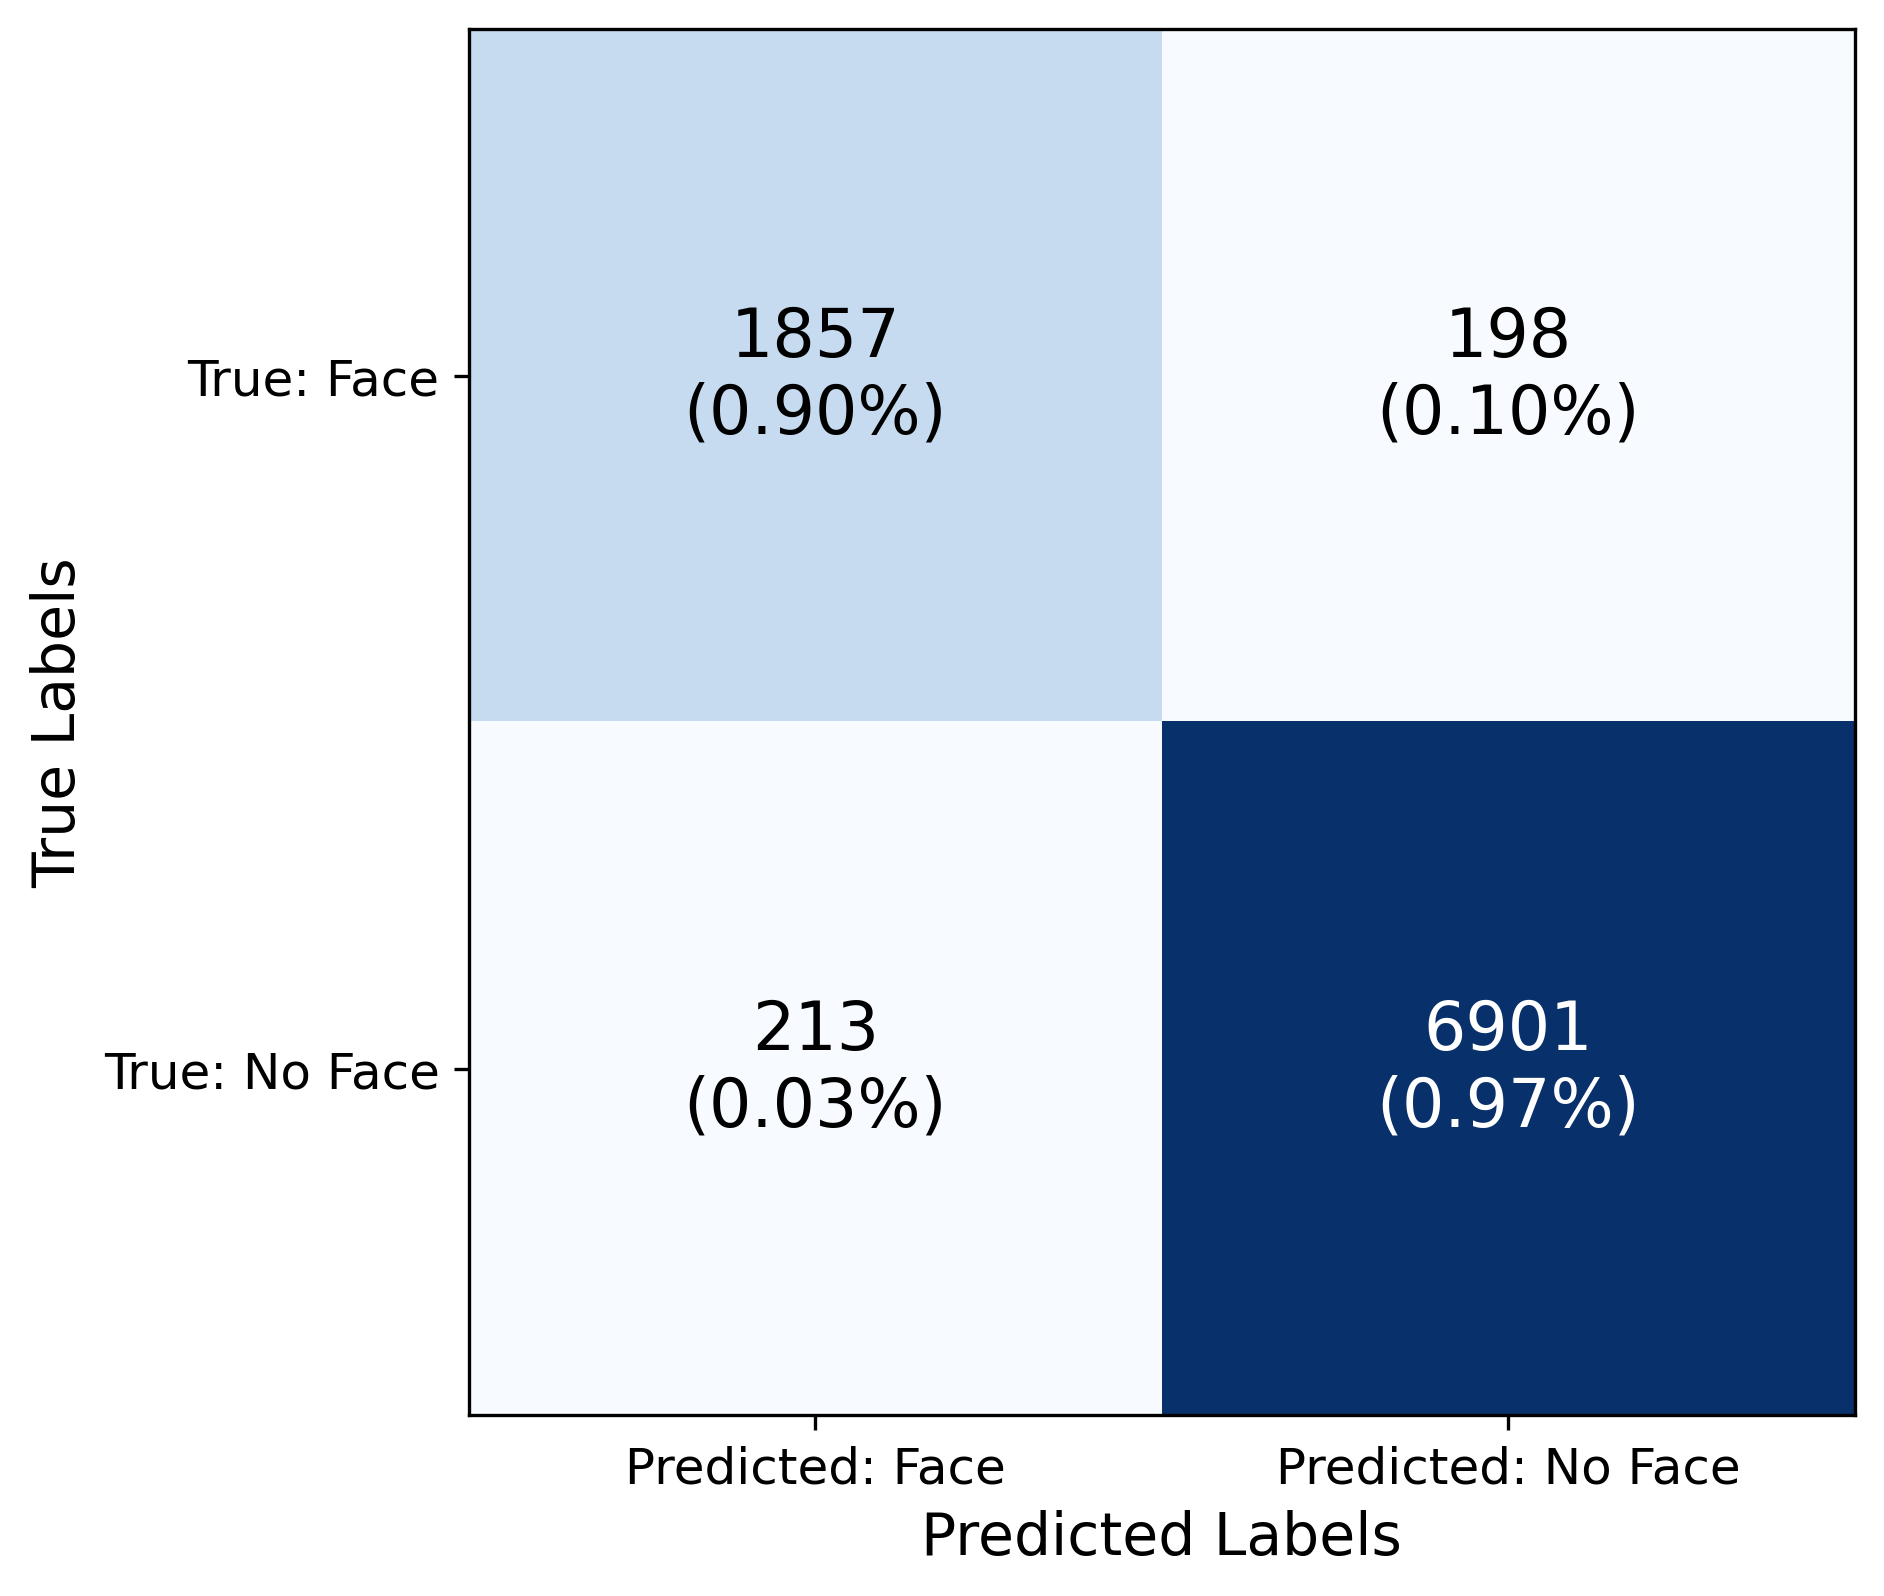

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the confusion matrix values
TN = 6901
FP = 198
FN = 213
TP = 1857

# Create the confusion matrix
conf_matrix = np.array([[TP, FP],
                        [FN, TN]])
# Create the confusion matrix
percentages = np.array([[0.90, 0.1],
                        [0.03, 0.97]])

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Predicted: Face', 'Predicted: No Face'])

# Plot the confusion matrix with high resolution and larger annotations
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)  # Set dpi for high resolution
disp.plot(cmap='Blues', ax=ax, values_format='d', colorbar=False, include_values=False)  # Turn off default values

# Annotate with counts and percentages
for i in range(2):
    for j in range(2):
        count = conf_matrix[i, j]
        percentage = percentages[i, j]
        # Set text color to white only for TN cell
        color = 'white' if (i == 1 and j == 1) else 'black'
        ax.text(j, i, f'{count}\n({percentage:.2f}%)',
                ha='center', va='center', fontsize=16, color=color)

# Adjust font size for labels
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_xticklabels(['Predicted: Face', 'Predicted: No Face'], fontsize=12)
ax.set_yticklabels(['True: Face', 'True: No Face'], fontsize=12)

# Save the figure with high resolution
plt.savefig('/home/nele_pauline_suffo/outputs/yolo_face_detections/face_validation_20250203_145751/face_detection_confusion_matrix.png', dpi=300)

# Display the plot
plt.show()